<a href="https://colab.research.google.com/github/priscillar-debug/GROUP-ASSIGNMENT/blob/master/data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 

<ipython-input-1-20639833dc69>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_cleaned.groupby('species')['petal length (cm)'].mean()


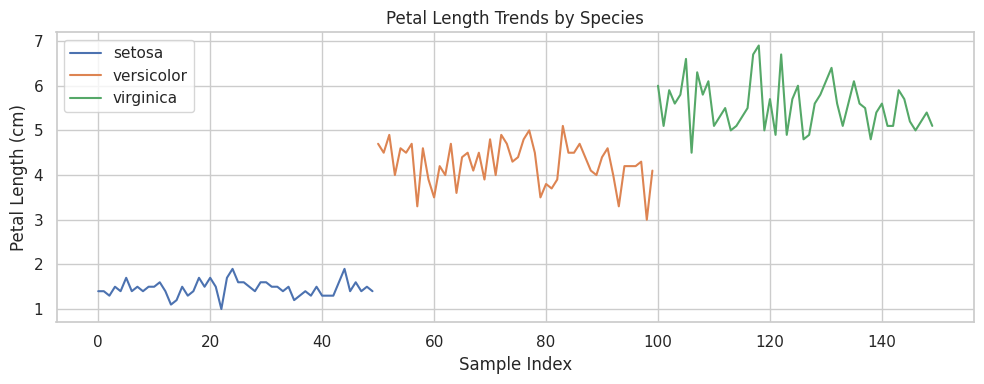

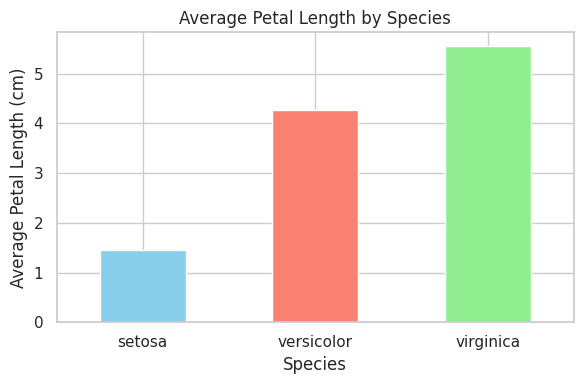

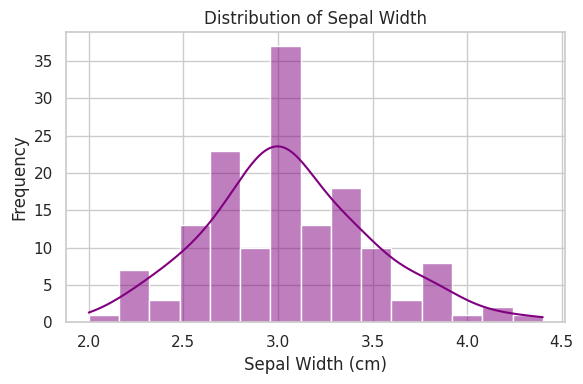

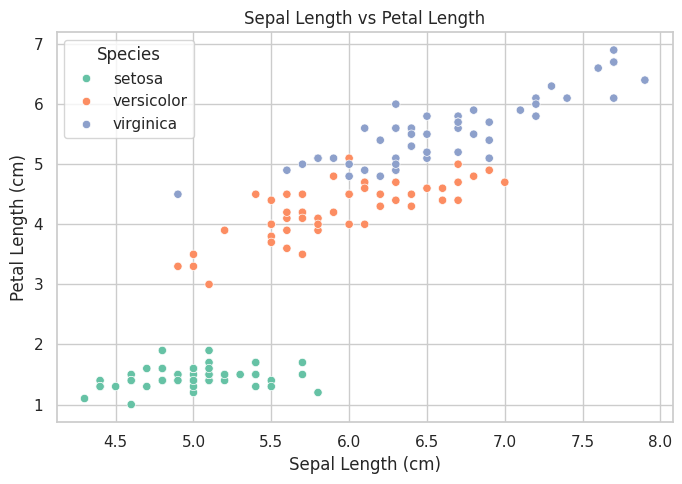

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Set seaborn style
sns.set(style="whitegrid")

# Task 1: Load and Explore the Dataset
try:
    iris_data = load_iris()
    df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
    df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
    print("Dataset loaded successfully.")
except Exception as e:
    print("Error loading dataset:", e)

# Display the first few rows
print("\nFirst 5 rows:")
print(df.head())

# Check data types and missing values
print("\nData types and missing values:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())

# Clean dataset by dropping missing values
df_cleaned = df.dropna()

# Task 2: Basic Data Analysis
print("\nDescriptive statistics:")
print(df_cleaned.describe())

# Group by species and compute average petal length
grouped = df_cleaned.groupby('species')['petal length (cm)'].mean()
print("\nAverage petal length per species:")
print(grouped)

print("\nInteresting Findings:")
print("→ Setosa has the shortest average petal length, while Virginica has the longest.")

# Task 3: Data Visualization

# Line chart - petal length trends
plt.figure(figsize=(10, 4))
for species in df_cleaned['species'].unique():
    subset = df_cleaned[df_cleaned['species'] == species]
    plt.plot(subset.index, subset['petal length (cm)'], label=species)
plt.title("Petal Length Trends by Species")
plt.xlabel("Sample Index")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.tight_layout()
plt.show()

# Bar chart - average petal length per species
plt.figure(figsize=(6, 4))
grouped.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Histogram - sepal width
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['sepal width (cm)'], kde=True, color='purple', bins=15)
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Scatter plot - sepal length vs petal length
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_cleaned,
    x='sepal length (cm)',
    y='petal length (cm)',
    hue='species',
    palette='Set2'
)
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.tight_layout()
plt.show()
